In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:,.2f}'.format
figsize=[12,10]
plt.rcParams['figure.figsize'] = figsize
plt.rcParams.update({'font.size': 14})


# Q: What is the price of a 1000 square foot house?

In [19]:
#import data 
data_loc = r"H:\Docs\Intro to Data Science\Regression_v2.xlsx"
df = pd.read_excel(data_loc, skiprows=2)
print(df.shape)

#Reshape so that you can scatter plot it
X = df["Sq Feet"].values.reshape(-1,1)
Y = df["Price"].values.reshape(-1,1)

df.tail()

(200, 7)


,Unnamed: 0,Number,Price per SqFoot,Rand_Perc,Sq Feet,Rand Price,Price
195,NaN,196,490,1.04,2460,"1,266,079.84","904,342.75"
196,NaN,197,492,1.08,2470,"1,321,856.35","944,183.10"
197,NaN,198,494,1.00,2480,"1,203,726.76","859,804.83"
198,NaN,199,496,1.01,2490,"1,264,457.61","903,184.01"
199,NaN,200,498,0.91,2500,"1,137,897.38","812,783.84"


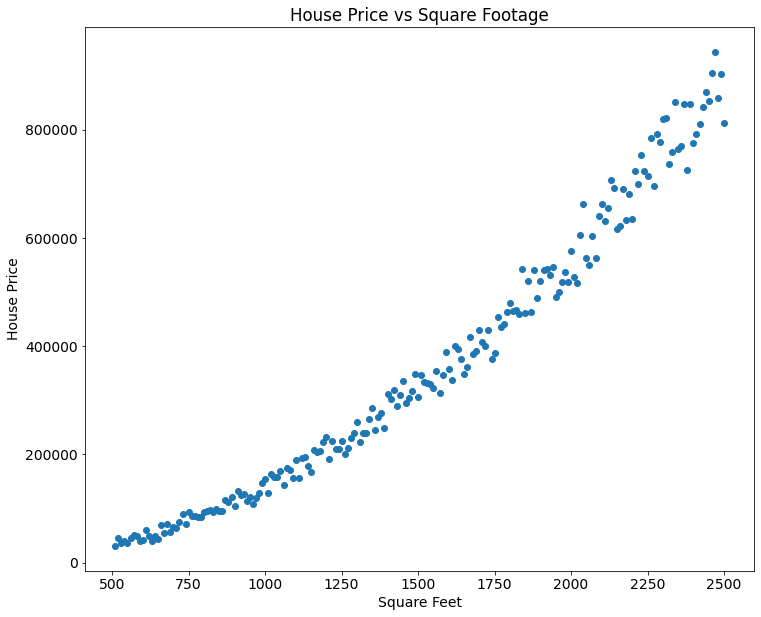

In [3]:
# Scatterplot
plt.scatter(X, Y)
plt.title("House Price vs Square Footage")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.show()

## SGD in Pytorch

In [4]:
x_orig = df["Sq Feet"].values.reshape(-1,1)
y_orig = df["Price"].values.reshape(-1,1)

# Normalise data
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x_orig)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y_orig)

# Convert to Pytorch
x = torch.tensor(x).float()
y = torch.tensor(y).float()
print(x.shape)
x[0:5]

torch.Size([200, 1])


tensor([[-1.7234],
        [-1.7061],
        [-1.6888],
        [-1.6714],
        [-1.6541]])

In [20]:
a = Variable(torch.ones(1,1), requires_grad=True)
b = Variable(torch.ones(1,1), requires_grad=True)

optimizer = torch.optim.SGD([a, b],lr=0.0001) # Use SGD machine-learning algorithm
loss_fn   = torch.nn.MSELoss()                # Use Mean-Squared-Error loss metric

for i in range(50000):                        # Take 50k steps downhill
    y_hat_linear  = a*x + b                   # Model
    loss = loss_fn(y_hat_linear, y)           # Calculate MSE for this particular model
    optimizer.zero_grad() 
    loss.backward()                           # Calculate slope of MSE loss surface
    optimizer.step()                          # Step downhill
    
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_linear = y_scaler.inverse_transform(y_hat_linear.detach().numpy())

Scenario= 0 loss= 1.041
Scenario= 10000 loss= 0.059
Scenario= 20000 loss= 0.041
Scenario= 30000 loss= 0.04
Scenario= 40000 loss= 0.04
Scenario= 49999 loss= tensor(0.0402, grad_fn=<MseLossBackward>)


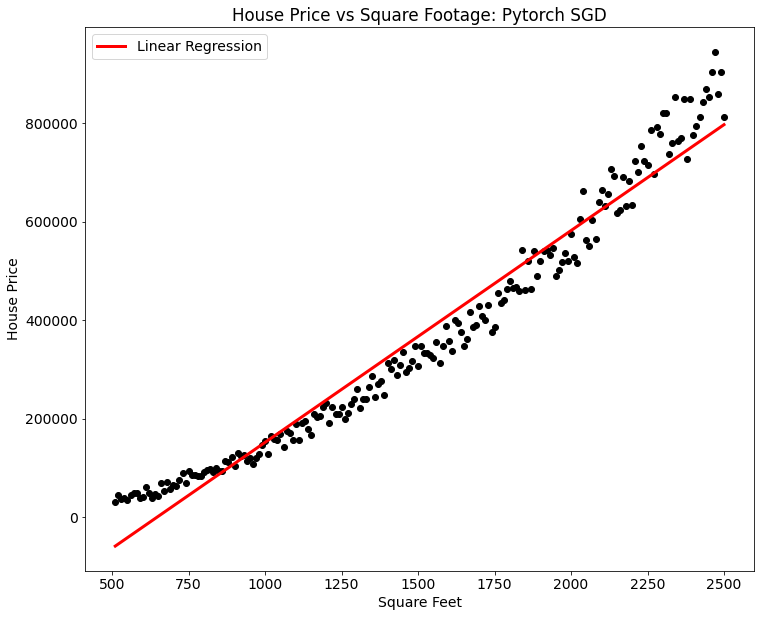

In [21]:
# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
#plt.plot(x_normal, y_hat_normal, color='red', linewidth=1, label = "Normal Equation")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

Scenario= 0 loss= 8.45
Scenario= 10000 loss= 0.011
Scenario= 20000 loss= 0.011
Scenario= 30000 loss= 0.011
Scenario= 40000 loss= 0.011
Scenario= 49999 loss= tensor(0.0110, grad_fn=<MseLossBackward>)


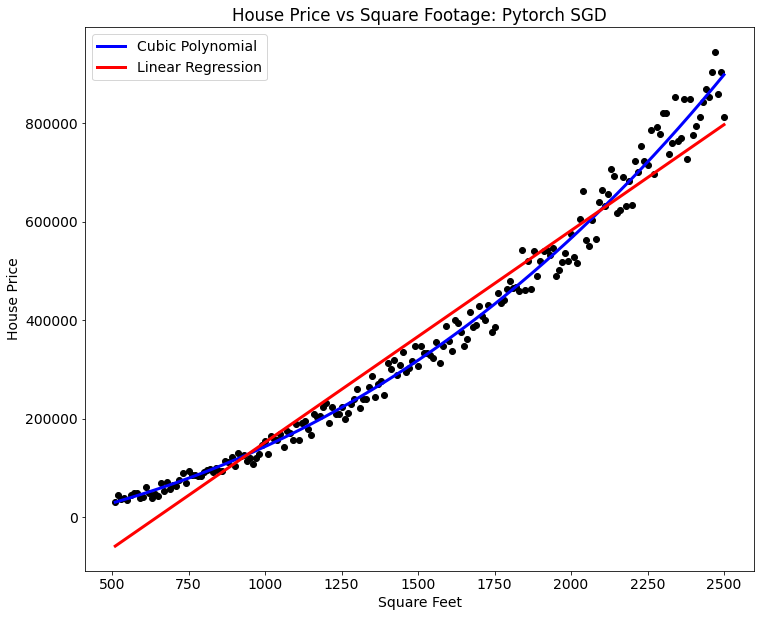

In [22]:
a = Variable(torch.ones(1,1), requires_grad=True)
b = Variable(torch.ones(1,1), requires_grad=True)
c = Variable(torch.ones(1,1), requires_grad=True)
d = Variable(torch.ones(1,1), requires_grad=True)

optimizer = torch.optim.SGD([a, b, c, d],lr=0.001) # Use SGD machine-learning algorithm
loss_fn = torch.nn.MSELoss()               # Use Mean-Squared-Error loss metric

for i in range(50000):                     # Take 50k steps downhill
    y_hat_cubic = a*x**3 + b*x**2 + c*x + d    # Model
    loss = loss_fn(y_hat_cubic, y)             # Calculate MSE for this particular model
    optimizer.zero_grad() 
    loss.backward()                        # Calculate slope of MSE loss surface
    optimizer.step()                       # Step downhill
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_cubic = y_scaler.inverse_transform(y_hat_cubic.detach().numpy())

# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
xs_cubic, ys_cubic = zip(*sorted(zip(x_orig, y_hat_cubic)))
plt.plot(xs_cubic, ys_cubic, color='blue', linewidth=3, label="Cubic Polynomial")
plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

Scenario= 0 loss= 6.963
Scenario= 10000 loss= 0.327
Scenario= 20000 loss= 0.119
Scenario= 30000 loss= 0.077
Scenario= 40000 loss= 0.069
Scenario= 49999 loss= tensor(0.0676, grad_fn=<MseLossBackward>)


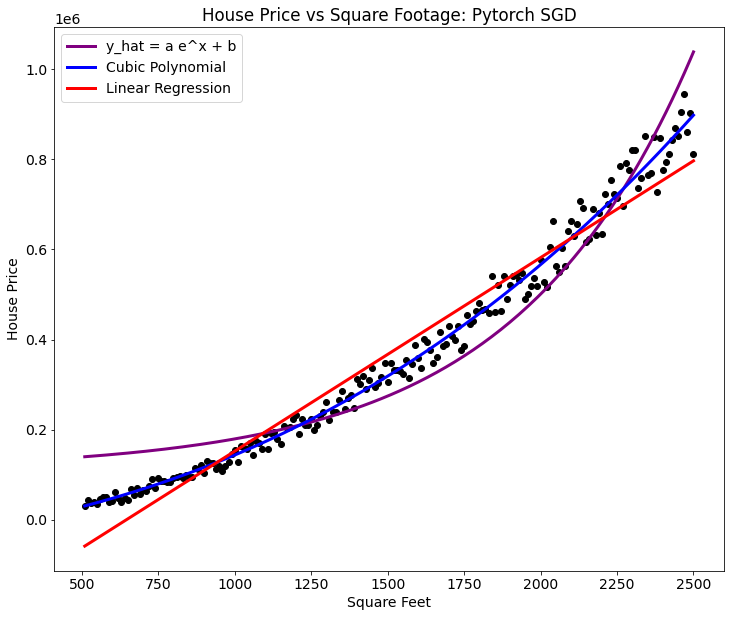

In [23]:
a = Variable(torch.ones(1,1), requires_grad=True)
b = Variable(torch.ones(1,1), requires_grad=True)

optimizer = torch.optim.SGD([a, b],lr=0.0001) # Use SGD machine-learning algorithm
loss_fn = torch.nn.MSELoss()      # Use Mean-Squared-Error loss metric

for i in range(50000):            # Take 50k steps downhill
    y_hat_exp = a*np.exp(x) + b     # Model
    loss = loss_fn(y_hat_exp, y)    # Calculate MSE for this particular model
    optimizer.zero_grad() 
    loss.backward()               # Calculate slope of MSE loss surface
    optimizer.step()              # Step downhill
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_exp = y_scaler.inverse_transform(y_hat_exp.detach().numpy())

# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
xs_exp, ys_exp = zip(*sorted(zip(x_orig, y_hat_exp)))
plt.plot(xs_exp, ys_exp, color='purple', linewidth=3, label="y_hat = a e^x + b")
plt.plot(xs_cubic, ys_cubic, color='blue', linewidth=3, label="Cubic Polynomial")
plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

Scenario= 0 loss= 1.117
Scenario= 10000 loss= 0.089
Scenario= 20000 loss= 0.066
Scenario= 30000 loss= 0.065
Scenario= 40000 loss= 0.065
Scenario= 49999 loss= tensor(0.0646, grad_fn=<MseLossBackward>)


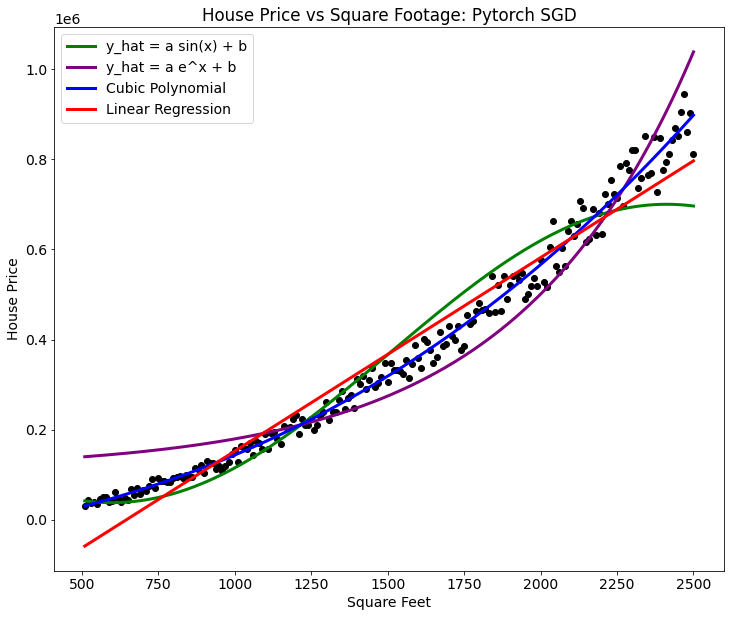

In [9]:
a = Variable(torch.ones(1,1), requires_grad=True)
b = Variable(torch.ones(1,1), requires_grad=True)

optimizer = torch.optim.SGD([a, b],lr=0.0001) # # Use SGD machine-learning algorithm
loss_fn = torch.nn.MSELoss()      # Use Mean-Squared-Error loss metric

for i in range(50000):            # Take 50k steps downhill
    y_hat_sin = a*np.sin(x) + b     # Model
    loss = loss_fn(y_hat_sin, y)    # Calculate MSE for this particular model
    optimizer.zero_grad() 
    loss.backward()               # Calculate slope of MSE loss surface
    optimizer.step()              # Step downhill
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_sin = y_scaler.inverse_transform(y_hat_sin.detach().numpy())

# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
xs_sin, ys_sin = zip(*sorted(zip(x_orig, y_hat_sin)))
plt.plot(xs_sin, ys_sin, color='green', linewidth=3, label="y_hat = a sin(x) + b")
plt.plot(xs_exp, ys_exp, color='purple', linewidth=3, label="y_hat = a e^x + b")
plt.plot(xs_cubic, ys_cubic, color='blue', linewidth=3, label="Cubic Polynomial")
plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [10]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x



Scenario= 0 loss= 1.422
Scenario= 10000 loss= 0.01
Scenario= 20000 loss= 0.009
Scenario= 30000 loss= 0.009
Scenario= 40000 loss= 0.009
Scenario= 49999 loss= tensor(0.0084, grad_fn=<MseLossBackward>)


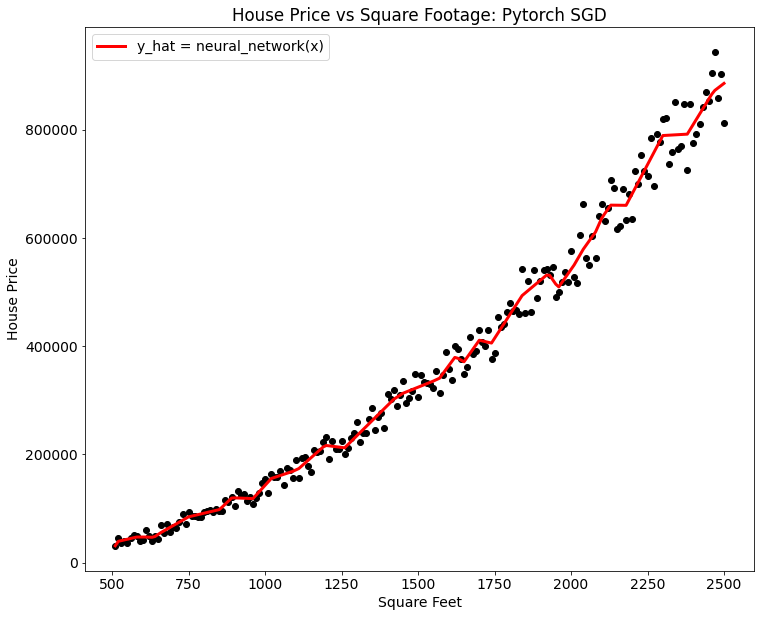

In [11]:
net = Net(n_feature=1, n_hidden=100, n_output=1)     # define the network

#optimizer = torch.optim.SGD(net.parameters(),lr=0.2) # # Use SGD machine-learning algorithm
optimizer = torch.optim.Adam(net.parameters(),lr=0.001) # # Use Adam machine-learning algorithm
loss_fn = torch.nn.MSELoss()      # Use Mean-Squared-Error loss metric

for i in range(50000):            # Take 50k steps downhill
    y_hat_nn = net(x)      # Model
    loss = loss_fn(y_hat_nn, y)    # Calculate MSE for this particular model
    
    optimizer.zero_grad() 
    loss.backward()               # Calculate slope of MSE loss surface
    optimizer.step()              # Step downhill
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_nn = y_scaler.inverse_transform(y_hat_nn.detach().numpy())

# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
xs_nn, ys_nn = zip(*sorted(zip(x_orig, y_hat_nn)))
plt.plot(xs_nn, ys_nn, color='red', linewidth=3, label="y_hat = neural_network(x)")
#plt.plot(xs_sin, ys_sin, color='green', linewidth=3, label="y_hat = a sin(x) + b")
#plt.plot(xs_exp, ys_exp, color='purple', linewidth=3, label="y_hat = a e^x + b")
#plt.plot(xs_cubic, ys_cubic, color='blue', linewidth=3, label="Cubic Polynomial")
#plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [12]:
class Net3(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(Net3, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer 1
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer 2
        self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3)   # hidden layer 3
        self.predict = torch.nn.Linear(n_hidden3, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

Scenario= 0 loss= 0.987
Scenario= 10000 loss= 0.007
Scenario= 20000 loss= 0.006
Scenario= 30000 loss= 0.005
Scenario= 40000 loss= 0.006
Scenario= 49999 loss= tensor(0.0050, grad_fn=<MseLossBackward>)


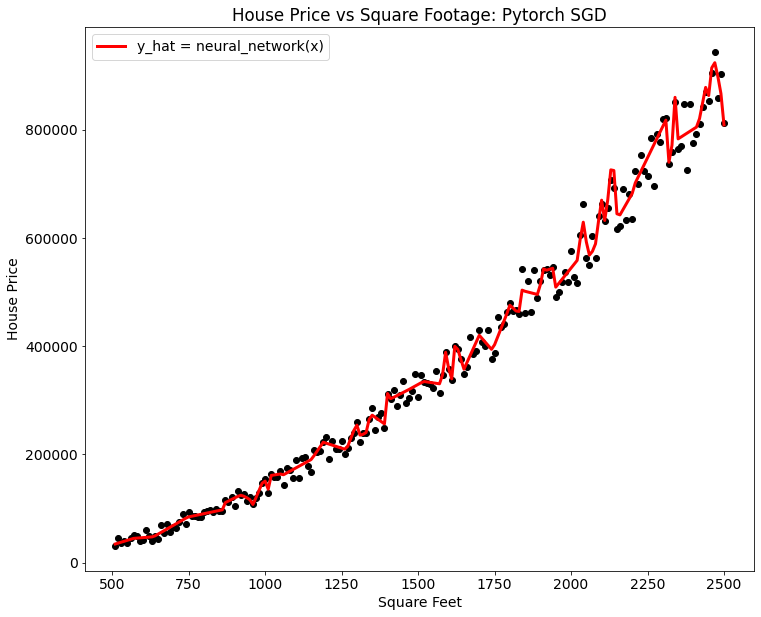

In [24]:
net = Net3(n_feature=1, n_hidden1=50, n_hidden2=50, n_hidden3=50, n_output=1)     # define the network

optimizer = torch.optim.Adam(net.parameters(),lr=0.01) # # Use Adam machine-learning algorithm
loss_fn = torch.nn.MSELoss()      # Use Mean-Squared-Error loss metric

for i in range(50000):            # Take 50k steps downhill
    y_hat_nn = net(x)      # Model
    loss = loss_fn(y_hat_nn, y)    # Calculate MSE for this particular model
    
    optimizer.zero_grad() 
    loss.backward()               # Calculate slope of MSE loss surface
    optimizer.step()              # Step downhill
    if (i % 10000 == 0):
        print("Scenario=", i, "loss=", round(loss.item(),3))
    
print("Scenario=", i, "loss=", loss)
y_hat_nn = y_scaler.inverse_transform(y_hat_nn.detach().numpy())

# Plot outputs
plt.scatter(x_orig, y_orig,  color='black')
xs_nn, ys_nn = zip(*sorted(zip(x_orig, y_hat_nn)))
plt.plot(xs_nn, ys_nn, color='red', linewidth=3, label="y_hat = neural_network(x)")
#plt.plot(xs_sin, ys_sin, color='green', linewidth=3, label="y_hat = a sin(x) + b")
#plt.plot(xs_exp, ys_exp, color='purple', linewidth=3, label="y_hat = a e^x + b")
#plt.plot(xs_cubic, ys_cubic, color='blue', linewidth=3, label="Cubic Polynomial")
#plt.plot(x_orig, y_hat_linear, color='red', linewidth=3, label="Linear Regression")
plt.title("House Price vs Square Footage: Pytorch SGD")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [14]:
# Save Notebook before converting to HTML
from IPython.display import display,Javascript 
display(Javascript("IPython.notebook.save_notebook()"), include=['application/javascript'])
!jupyter nbconvert --to=html "SAI Example.ipynb" 
print("Run Finished", pd.to_datetime('now'))

Run Finished 2021-06-23 16:05:42.328163


[NbConvertApp] Converting notebook SAI Example.ipynb to html
[NbConvertApp] Writing 1035751 bytes to SAI Example.html


In [ ]:
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler

#import os